before use this script, you should have the following packages
you can install GeoPandas git clone https://github.com/kjordahl/geopandas 
and then install it with 
<pre><code>
    python setup.py install
    conda install fiona
    conda install pysal
</code></pre>

yxcheng@uw.edu
Yuxuan Cheng
https://sites.google.com/view/ycheng

In [1]:
import shapely
import geopandas as gpd

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib import interactive
#interactive(True)
%matplotlib inline

In [3]:
import pysal
from scipy import ndimage
#p1 = shapely.geometry.Polygon([(0, 0), (1, 0), (1, 1)])
#p2 = shapely.geometry.Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
#p3 = shapely.geometry.Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
#g = gpd.GeoSeries([p1,p2,p3])
#g.area
#g.plot()
#matplotlib.pyplot.show()

In [4]:
#road the data
boros = gpd.GeoDataFrame.from_file('project/Output/SelectedBlocks.shp')

In [5]:
#show the first data frame
boros.ix[0]
#boros.blocks

ALAND10                                                  121128
AWATER10                                                      0
BLOCKCE10                                                  1001
COUNTYFP10                                                  033
FUNCSTAT10                                                    S
GEOID10                                         530330067001001
INTPTLAT10                                          +47.6319178
INTPTLON10                                         -122.3399002
MTFCC10                                                   G5040
NAME10                                               Block 1001
OBJECTID                                                      1
STATEFP10                                                    53
Shape_Area                                           1.4496e-05
Shape_Leng                                             0.027448
TRACTCE10                                                006700
TRACT_10                                

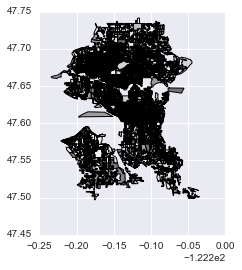

In [6]:
#plot the dataframe
boros.plot()
matplotlib.pyplot.show()

In [7]:
#get the data(future will read antother dataset)
boros['InCount'] = boros['OBJECTID'].mod(255)

In [8]:
#show the range of OBJECCTID
boros['OBJECTID'].max()

34663

In [9]:
#show the name of the “geometry” column of gpd
boros.geometry.name

'geometry'

In [10]:
#create the centroid of each block (point data)
boros['centroid_column'] = boros.centroid

In [11]:
#show the data
boros.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAME10,...,Shape_Area,Shape_Leng,TRACTCE10,TRACT_10,TRBL,UACE10,UR10,geometry,InCount,centroid_column
0,121128.0,0.0,1001,033,S,530330067001001,+47.6319178,-122.3399002,G5040,Block 1001,...,1.449595e-05,0.027448,006700,6700,6700.1001,None,None,"POLYGON ((-122.3406299995747 47.6324870001751,...",1,POINT (-122.3399002366727 47.63191799346607)
1,20412.0,0.0,1009,033,S,530330069001009,+47.6368455,-122.3629779,G5040,Block 1009,...,2.443019e-06,0.006327,006900,6900,6900.1009,None,None,"POLYGON ((-122.362319999768 47.63593299990816,...",2,POINT (-122.3629779418765 47.63684552155818)
2,16082.0,0.0,5021,033,S,530330116005021,+47.5204486,-122.3920438,G5040,Block 5021,...,1.920568e-06,0.005893,011600,11600,11600.5021,None,None,POLYGON ((-122.3917790003005 47.51974199989354...,4,POINT (-122.392043788155 47.52044865187271)
3,2697.0,0.0,5023,033,S,530330116005023,+47.5205365,-122.3899013,G5040,Block 5023,...,3.220622e-07,0.003135,011600,11600,11600.5023,None,None,"POLYGON ((-122.390215000122 47.52080000012006,...",5,POINT (-122.3899012536813 47.52053650264553)
4,16320.0,0.0,2007,033,S,530330115002007,+47.5272927,-122.3806803,G5040,Block 2007,...,1.949297e-06,0.006836,011500,11500,11500.2007,None,None,"POLYGON ((-122.3793320000716 47.5276230000016,...",18,POINT (-122.3806803250455 47.52729271292806)


In [12]:
#change the name of column
boros.rename(columns={'centroid_column': 'centroid_XY'})

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,MTFCC10,NAME10,...,Shape_Area,Shape_Leng,TRACTCE10,TRACT_10,TRBL,UACE10,UR10,geometry,InCount,centroid_XY
0,121128.0,0.0,1001,033,S,530330067001001,+47.6319178,-122.3399002,G5040,Block 1001,...,1.449595e-05,0.027448,006700,6700,6700.1001,None,None,"POLYGON ((-122.3406299995747 47.6324870001751,...",1,POINT (-122.3399002366727 47.63191799346607)
1,20412.0,0.0,1009,033,S,530330069001009,+47.6368455,-122.3629779,G5040,Block 1009,...,2.443019e-06,0.006327,006900,6900,6900.1009,None,None,"POLYGON ((-122.362319999768 47.63593299990816,...",2,POINT (-122.3629779418765 47.63684552155818)
2,16082.0,0.0,5021,033,S,530330116005021,+47.5204486,-122.3920438,G5040,Block 5021,...,1.920568e-06,0.005893,011600,11600,11600.5021,None,None,POLYGON ((-122.3917790003005 47.51974199989354...,4,POINT (-122.392043788155 47.52044865187271)
3,2697.0,0.0,5023,033,S,530330116005023,+47.5205365,-122.3899013,G5040,Block 5023,...,3.220622e-07,0.003135,011600,11600,11600.5023,None,None,"POLYGON ((-122.390215000122 47.52080000012006,...",5,POINT (-122.3899012536813 47.52053650264553)
4,16320.0,0.0,2007,033,S,530330115002007,+47.5272927,-122.3806803,G5040,Block 2007,...,1.949297e-06,0.006836,011500,11500,11500.2007,None,None,"POLYGON ((-122.3793320000716 47.5276230000016,...",18,POINT (-122.3806803250455 47.52729271292806)
5,41595.0,0.0,2005,033,S,530330121002005,+47.5068656,-122.3787497,G5040,Block 2005,...,4.966028e-06,0.012906,012100,12100,12100.2005,None,None,POLYGON ((-122.3760010002458 47.50639300033686...,21,POINT (-122.3787497508842 47.50686558552383)
6,21236.0,0.0,2013,033,S,530330066002013,+47.6348524,-122.3240336,G5040,Block 2013,...,2.541550e-06,0.011712,006600,6600,6600.2013,None,None,"POLYGON ((-122.324698999659 47.63225600031433,...",32,POINT (-122.3240336290084 47.63485245185199)
7,10454.0,0.0,1014,033,S,530330067001014,+47.6328601,-122.3428443,G5040,Block 1014,...,1.251077e-06,0.004481,006700,6700,6700.1014,None,None,POLYGON ((-122.3434029997485 47.63341599984869...,33,POINT (-122.3428443205387 47.63286013116908)
8,304451.0,0.0,6000,033,S,530330032006000,+47.6806102,-122.4069685,G5040,Block 6000,...,3.646848e-05,0.037713,003200,3200,3200.6000,None,None,"POLYGON ((-122.412540999967 47.67621899970726,...",40,POINT (-122.4069682954432 47.68061033180799)
9,18654.0,0.0,4017,033,S,530330032004017,+47.6690497,-122.3969885,G5040,Block 4017,...,2.234018e-06,0.007017,003200,3200,3200.4017,None,None,POLYGON ((-122.3983189997219 47.66862300015151...,43,POINT (-122.3969884679725 47.66904970401041)


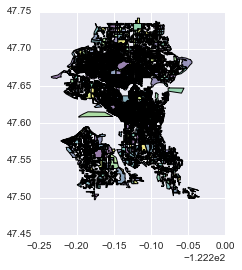

In [13]:
#plot the blocks and "In Count"
#%matplotlib qt
fig1 = boros.plot(column='InCount', cmap='viridis')
#fig1.colorbar()
plt.show()
plt.colorbar
plt.savefig('map2.pdf')

In [14]:
#the hel
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='viridis'):
    """
    plot the heat map
    This function takes a GeoDataFrame with point geometries and shows a matplotlib plot of heatmap density 
    """
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    
    #using numpy's 2D histogram binning with smoothing from scipy
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [15]:
#create a new data whose “geometry” column is the center of blocks (point geometries)
boros_point = boros.set_geometry('centroid_column')

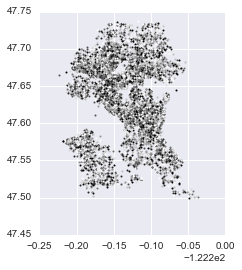

In [16]:
#plot the piont data
boros_point.plot()
plt.show()

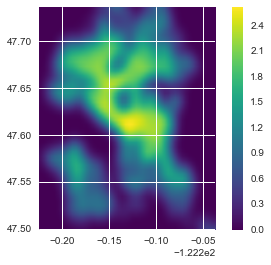

In [17]:
#plot the heat map
heatmap(boros_point, bins=50, smoothing=1.5)